In [45]:
import functools
import pandas as pd
import torch
import seaborn as sns

sns.set()

In [78]:
# detect gpu availability
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [6]:
model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased')

Using cache found in /Users/rweng/.cache/torch/hub/huggingface_pytorch-transformers_master


In [7]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [8]:
model_sc = torch.hub.load('huggingface/pytorch-transformers', 'modelForSequenceClassification', 'bert-base-uncased')

Using cache found in /Users/rweng/.cache/torch/hub/huggingface_pytorch-transformers_master


In [10]:
train_data = pd.read_csv('../input/google-quest-challenge/train.csv')
test_data = pd.read_csv('../input/google-quest-challenge/test.csv')

In [11]:
train_data.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [12]:
train_data.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [14]:
train_data.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [13]:
train_data.describe()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,4829.665899,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,...,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,2789.689555,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,...,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,2389.000000,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,...,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,4847.000000,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,7222.000000,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,9647.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Tokenize Body/Answer

In [15]:
train_data.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [17]:
# Grab question title, body, and answers
title  = train_data.question_title
body   = train_data.question_body
answer = train_data.answer

In [20]:
def token_len(text): return len(tokenizer.tokenize(text))

In [21]:
title_len  = title.map(token_len)

In [22]:
body_len   = body.map(token_len)

In [23]:
answer_len = answer.map(token_len)

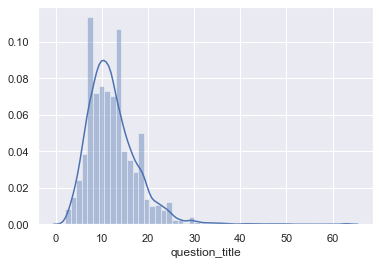

In [28]:
sns.distplot(title_len);

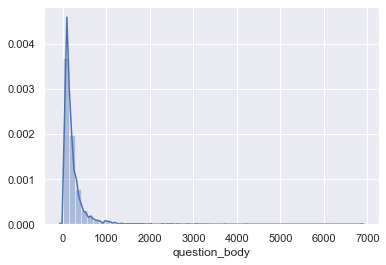

In [29]:
sns.distplot(body_len);

In [30]:
body_len.describe()

count    6079.000000
mean      227.475736
std       336.998146
min         0.000000
25%        77.000000
50%       134.000000
75%       251.000000
max      6849.000000
Name: question_body, dtype: float64

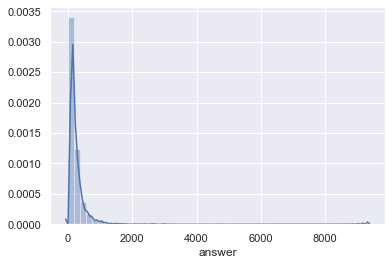

In [32]:
sns.distplot(answer_len);

In [33]:
answer_len.describe()

count    6079.000000
mean      216.351703
std       287.876347
min         4.000000
25%        75.000000
50%       137.000000
75%       257.000000
max      9319.000000
Name: answer, dtype: float64

In [34]:
(title_len + body_len + answer_len).describe()

count    6079.000000
mean      456.086527
std       471.735169
min        18.000000
25%       208.000000
50%       334.000000
75%       529.500000
max      9453.000000
dtype: float64

# Helper functions

In [66]:
def preprocess_BERT(encoder, q_row):
    '''Preprocess dataframe row for BERT
    
    Parameters
    ----------
    encoder: callable, takes in text, returns encoded tokens, 
             should be provided by pre-trained model
    
    q_row  : dataframe row containing columns for question_title, 
             question_body, and answer
    
    Returns
    -------
    Sequence of tokens of length 512, a mask, and positional embeddings.
    '''
    
    # Set max length allowed by BERT model
    MAX_LENGTH = 512
    
    # Get question title, body, and answer from dataframe row
    question = q_row.question_title + q_row.question_body
    answer   = q_row.answer
    
    # Encode question and answer without [CLS] and [SEP]
    question_tok = encoder(question, add_special_tokens = False)
    answer_tok   = encoder(answer, add_special_tokens = False)

    print(len(question_tok), len(answer_tok))
    # Truncate tokens to length MAX_LENGTH - 3 to account for special tokens
    while len(question_tok + answer_tok) > (MAX_LENGTH - 3):
        
        # Pick the longest list, then pop last item in list
        # Default to shortening answer if there is a tie
        array_to_pop = max([answer_tok, question_tok], key = len)
        array_to_pop.pop()
    
    # Get encodings for [CLS] and [SEP]
    cls_token_encoded = encoder(['[CLS]'], add_special_tokens = False)
    sep_token_encoded = encoder(['[SEP]'], add_special_tokens = False)
    
    # Combine question, answer, and special tokens
    content_tok = cls_token_encoded + question_tok + \
                  sep_token_encoded + answer_tok   + \
                  sep_token_encoded
    
    # Create padding
    padding_len = MAX_LENGTH - len(content_tok)
    padding     = [0] * padding_len
    
    # Add padding
    final_tok   = content_tok + padding
    
    # Compute segment_ids
    segment_ids = [0] * (len(question_tok) + 2) + \
                  [1] * (len(answer_tok)   + 1) + \
                  padding
    
    # Compute the mask
    mask        = [1] * len(content_tok) + padding
    
    return final_tok, segment_ids, mask

# Load in tokenizer for BERT base uncased
BERT_base_uncased_tokenizer  = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased') 

# Curry preprocess function and partially apply it
preprocess_BERT_base_uncased = functools.partial(preprocess_BERT, 
                                                 BERT_base_uncased_tokenizer.encode)

Using cache found in /Users/rweng/.cache/torch/hub/huggingface_pytorch-transformers_master


In [67]:
%%capture
processed_data = train_data.apply(preprocess_BERT_base_uncased, 
                                  axis = 'columns')

In [ ]:
# def create_dataset(df, preprocessor, labels):
    

# Testing out pytorch tokenizer

In [43]:
base_tokenizer.encode(['[SEP]'], add_special_tokens = False)

[102]

In [45]:
text_1 = "Who was Jimmy Henson ?"
text_2 = "Jim Henson was a puppeteer."

# Tokenized input with special tokens around it (for BERT: [CLS] at the beginning and [SEP] at the end)
indexed_tokens = base_tokenizer.encode(text_1, text_2, add_special_tokens=True)

In [46]:
base_tokenizer.tokenize(text_1)

['who', 'was', 'jimmy', 'henson', '?']

In [47]:
base_tokenizer.tokenize(text_2)

['jim', 'henson', 'was', 'a', 'puppet', '##eer', '.']

In [44]:
indexed_tokens

[101,
 2040,
 1059,
 3736,
 5261,
 27227,
 1029,
 102,
 3958,
 27227,
 2001,
 1037,
 13997,
 11510,
 1012,
 102]

In [40]:
base_tokenizer.ids_to_tokens[5261]

'jimmy'

In [49]:
segments_tensors = torch.tensor([segments_ids])

In [50]:
segments_tensors

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

In [51]:
tokens_tensor = torch.tensor([indexed_tokens])

In [52]:
tokens_tensor

tensor([[  101,  2040,  2001,  5261, 27227,  1029,   102,  3958, 27227,  2001,
          1037, 13997, 11510,  1012,   102]])

In [53]:
# Define sentence A and B indices associated to 1st and 2nd sentences (see paper)
segments_ids = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Convert inputs to PyTorch tensors
segments_tensors = torch.tensor([segments_ids])
tokens_tensor = torch.tensor([indexed_tokens])

# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased')

with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, token_type_ids=segments_tensors)

In [54]:
encoded_layers

tensor([[[-0.4240,  0.2151, -0.8330,  ..., -1.0132,  0.7618,  0.6525],
         [-0.7718, -0.2736, -0.5494,  ..., -0.0212,  0.7109, -0.2639],
         [ 0.0835, -0.5506, -0.3897,  ..., -0.1108,  0.5886,  0.1662],
         ...,
         [-0.0454, -0.0224,  0.2818,  ...,  0.0837,  0.2598, -0.6440],
         [ 0.6700,  0.1874, -0.4618,  ...,  0.2196, -0.4222, -0.2313],
         [ 0.6586,  0.1840, -0.4281,  ...,  0.2181, -0.4304, -0.2145]]])